# SUPERVISED MACHINE LEARNING 
## RULE-BASED CLASSIFICATION

In [32]:
# importing libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Data Pre-Processing

In [33]:
# Importing the data as Dataframe
df = pd.read_csv("D:\Project-VH_3\coursedata.csv")
df.head(10)

,course_name,fin_aid_status,no_enrolled,no_reviews,skills,star_rating
0,Introduction to TensorFlow for Artificial Inte...,Financial aid available,343931,18784,computer vision|tensorflow|machine learning,4.8
1,Google Advanced Data Analytics Capstone,Financial aid available,11511,156,executive summaries|machine learning|python pr...,4.9
2,Excel Basics for Data Analysis,Financial aid available,222648,6194,data science|spreadsheet|microsoft excel|data ...,4.8
3,"Decisions, Decisions: Dashboards and Reports",Financial aid available,10598,223,presenting data insights|tableau software|data...,4.8
4,Introduction to Data Engineering,Financial aid available,93254,1929,data science|information engineering|database ...,4.7
5,Machine Learning with Python,Financial aid available,357303,14416,scipy and scikit-learn|machine learning|regres...,4.7
6,Data Visualization with Python,Financial aid available,227526,11103,dashboards and charts|dash|python programming|...,4.5
7,Data Science with R - Capstone Project,Financial aid available,7207,40,data science|r programming|data visualization ...,4.5
8,Data Engineering Capstone Project,Financial aid available,6643,58,relational databases|python programming|nosql|...,4.6
9,Data Visualization with R,Financial aid available,13699,174,data science|data analysis|data visualization ...,4.6


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   course_name     492 non-null    object 
 1   fin_aid_status  486 non-null    object 
 2   no_enrolled     492 non-null    int64  
 3   no_reviews      492 non-null    int64  
 4   skills          425 non-null    object 
 5   star_rating     492 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 23.2+ KB


In [35]:
df.isna().sum()

course_name        0
fin_aid_status     6
no_enrolled        0
no_reviews         0
skills            67
star_rating        0
dtype: int64

<Axes: >

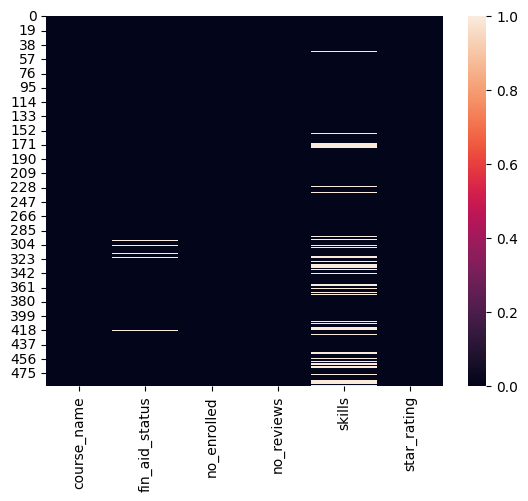

In [36]:
# Visualizing missing values
sns.heatmap(df.isna())

In [37]:
# dropping Rows of missing values
df.dropna(axis = 0, inplace =True)

In [38]:
# Re-checking
df.isna().sum()

course_name       0
fin_aid_status    0
no_enrolled       0
no_reviews        0
skills            0
star_rating       0
dtype: int64

#### Collecting all dinstinct skills
#####  Our classification is based on the skills that one gain after finishing a specific course.

In [39]:
# looping through all the skills and deleting duplicates with set
skill_set = set()
for skills in df["skills"] :
    for skill in skills.split("|") :
        skill_set.add(skill)
        

In [40]:
# Collecting all skills as a text file 
# I framed the Rules with the help of web and domain Knowlegde
with open("skills.txt","w") as skill_write :
    for skill in skill_set :
        skill_write.write(skill+"\n")
    

In [41]:
# Supervised Machine learning --> Rule based Classfication 
# intial Set up 
df['category'] = 'Others'


In [42]:
df

,course_name,fin_aid_status,no_enrolled,no_reviews,skills,star_rating,category
0,Introduction to TensorFlow for Artificial Inte...,Financial aid available,343931,18784,computer vision|tensorflow|machine learning,4.8,Others
1,Google Advanced Data Analytics Capstone,Financial aid available,11511,156,executive summaries|machine learning|python pr...,4.9,Others
2,Excel Basics for Data Analysis,Financial aid available,222648,6194,data science|spreadsheet|microsoft excel|data ...,4.8,Others
3,"Decisions, Decisions: Dashboards and Reports",Financial aid available,10598,223,presenting data insights|tableau software|data...,4.8,Others
4,Introduction to Data Engineering,Financial aid available,93254,1929,data science|information engineering|database ...,4.7,Others
...,...,...,...,...,...,...,...
481,Analyze Data,Financial aid available,0,14,data insight|data analysis|dissemination|prepr...,4.7,Others
482,"Extract, Transform, and Load Data",Financial aid available,2856,16,"extraction, transformation and loading (etl)|c...",4.8,Others
483,Train Machine Learning Models,Financial aid available,0,0,design of experiments|machine learning|cluster...,0.0,Others
484,Address Business Issues with Data Science,Financial aid available,2261,18,data-informed decision-making|scope (project m...,4.6,Others


In [43]:
# Rule 1 --> Data Science and Analytics : 1
df['category'] = df.apply(lambda row: 'Data Science and Analytics' if any(skill.lower() in row['skills'].split("|") 
    for skill in ['Python', 'R', 'Machine Learning', 'Data Visualization', 'Natural Language Processing (NLP)', 
    'Statistical Analysis', 'Data Modeling', 'Feature Engineering']) and row["category"] == "Others" else 
    row['category'], axis=1)

In [44]:
# Rule 2 --> Data Science and Analytics : 2 
df['category'] = df.apply(lambda row: 'Data Science and Analytics' if any(skill.lower() in row['skills'].split("|") 
    for skill in ["Data Science", "Machine Learning", "Deep Learning", "Artificial Intelligence (AI)", 
    "Data Visualization", "Data Cleaning", "Data Transformation", "Data Processing", "Statistical Analysis", 
    "Exploratory Data Analysis (EDA)", "Regression Analysis", "Classification Algorithms", "Clustering Algorithms", 
    "Python Programming (NumPy, Pandas)","R Programming", "SAS Programs", "SQL and RDBMS", "Tableau Software"]) 
    and row["category"] == "Others" else row['category'], axis=1)

In [45]:
# Rule 3 --> Cybersecurity
df['category'] = df.apply(lambda row: 'Cybersecurity' if any(skill.lower() in row['skills'].split("|") 
    for skill in ["Cybersecurity", "Network Security", "Information Security (INFOSEC)", "Security Testing", 
    "Vulnerability Assessment", "Ethical Hacking", "Intrusion Detection Systems (IDS)", "Threat Analysis", "Malware", 
    "Encryption Techniques", "Security Audits", "OWASP (Open Web Application Security Project)", 
    "Identity Management (IDM)", "Firewall", "Incident Response Playbooks"]) and row["category"] == "Others" 
    else row['category'], axis=1)

In [46]:
# Rule 4 --> Project Management
df['category'] = df.apply(lambda row: 'Project Management' if any(skill.lower() in row['skills'].split("|") 
    for skill in ["Project Management", "Agile and Scrum", "Stakeholder Management", "Task Estimation", 
    "Project Planning", "Risk Management", "Sprint Planning", "Kanban", "PMI-CAPM", "Business Analysis", 
    "Change Management", "Leadership and Management", "Gap Analysis", "Project Execution", "Resource Management"]) 
    and row["category"] == "Others" else row['category'], axis=1)

In [47]:
# Rule 5 --> Cloud Computing
df['category'] = df.apply(lambda row: 'Cloud Computing' if any(skill.lower() in row['skills'].split("|") 
    for skill in [ "Cloud Computing", "AWS Cloud", "Microsoft Azure", "Google Cloud Platform (GCP)", 
    "Cloud Architecture", "Cloud Security", "Cloud Storage", "Serverless Computing", "Infrastructure as Code", 
    "Kubernetes", "Docker", "AWS Identity and Access Management (IAM)", "AWS Management Console"]) and 
    row["category"] == "Others" else row['category'], axis=1)

In [48]:
# Rule 6 --> Web Development and Design
df['category'] = df.apply(lambda row: 'Web Development and Design' if any(skill.lower() in row['skills'].split("|") 
    for skill in [ "Web Development", "HTML", "CSS", "JavaScript", "React", "Angular", "Vue.js", 
    "User Experience (UX) Design", "User Interface (UI) Design", "Responsive Web Design", "Front-End Development", 
    "Back-End Development", "Web Scraping"]) and row["category"] == "Others" else row['category'], axis=1)

In [49]:
# Rule 7 --> Business and Marketing
df['category'] = df.apply(lambda row: 'Business and Marketing' if any(skill.lower() in row['skills'].split("|") 
    for skill in ["Business Strategy", "Marketing Strategy", "Market Analysis", "Customer Engagement", 
    "Customer Relationship Management (CRM)", "Sales Process Engineering", "E-Commerce", "Social Media Marketing", 
    "Content Marketing", "Email Marketing", "Advertising", "SEO and SEM"]) and row["category"] == "Others" 
    else row['category'], axis=1)

In [50]:
# Rule 8 --> Accounting and Finance
df['category'] = df.apply(lambda row: 'Accounting and Finance' if any(skill.lower() in row['skills'].split("|") 
    for skill in [ "Financial Accounting", "Cost and Profit Analysis", "Asset Management", "Liabilities and Equity", 
    "Taxation (GST, Returns, etc.)", "Accounting Software", "Financial Statements", "Reconciliation", "Budgeting", 
    "Financial Reports Analysis"]) and row["category"] == "Others" else row['category'], axis=1)

In [51]:
# Rule 9 --> Networking and Systems
df['category'] = df.apply(lambda row: 'Networking and Systems' if any(skill.lower() in row['skills'].split("|") 
    for skill in [ "Networking Basics", "Network Troubleshooting", "Network Security", "Operating Systems", "Linux", 
    "Windows", "System Administration", "Shell Scripting", "Database Administration", "Virtualization", 
    "Cloud Infrastructure"]) and row["category"] == "Others" else row['category'], axis=1)

In [52]:
# Rule 10 --> Software Development

df['category'] = df.apply(lambda row: 'Software Development' if any(skill.lower() in row['skills'].split("|") 
    for skill in ['Java', 'C++', 'JavaScript', 'APIs', 'Software Architecture', 'Code of Ethics', 'Debugging', 
    'CI/CD', 'Agile Management']) and row["category"] == "Others"else row['category'], axis=1)

In [53]:
# Rule 11 --> Database Management

df['category'] = df.apply(lambda row: 'Database Management' if any(skill.lower() in row['skills'].split("|") 
    for skill in ['SQL', 'Data Warehousing', 'Database Optimization', 'NoSQL', 'Apache Hadoop', 'Apache Spark', 
    'ETL', 'Database Administration']) and row["category"] == "Others" else row['category'], axis=1)

In [54]:
# Rule 12 --> Network Administration
df['category'] = df.apply(lambda row: 'Network Administration' if any(skill.lower() in row['skills'].split("|") 
    for skill in ['Network Theory', 'Network Management / Troubleshooting', 'IPv4', 'DNS', 'VPN', 'Load Balancing', 
    'Apache Kafka']) and row["category"] == "Others" else row['category'], axis=1)

In [55]:
# Rule 13 --> UI/UX Design
df['category'] = df.apply(lambda row: 'UI/UX Design' if any(skill.lower() in row['skills'].split("|") 
    for skill in ['User Experience (UX)', 'User Experience Design (UXD)', 'Adobe XD', 'Figma', 'UX and UI', 
    'Usability Testing', 'Design a web application']) and row["category"] == "Others" else row['category'], axis=1)

In [56]:
# Rule 14 --> Digital Marketing
df['category'] = df.apply(lambda row: 'Digital Marketing' if any(skill.lower() in row['skills'].split("|") 
    for skill in ['Digital Marketing', 'Email marketing strategy', 'Marketing Analytics', 
    'Search Engine Optimization (SEO)', 'Search Engine Marketing', 'Email marketing analytics', 'Social Selling']) 
    and row["category"] == "Others" else row['category'], axis=1)

In [57]:
# Rule 15 --> Coaching and Leadership 
df['category'] = df.apply(lambda row: 'Coaching and Leadership' if any(skill.lower() in row['skills'].split("|") 
    for skill in ['Leadership', 'Communication', 'Teamwork', 'Ethical Leadership', 'Influencing', 
    'Professional Certificate', 'Certification', 'Human-centered coaching']) and row["category"] == "Others" 
    else row['category'], axis=1)

In [58]:
# Rule 16 --> Programming and Development
df['category'] = df.apply(lambda row: 'Programming and Development' if any(skill.lower() in row['skills'].split("|") 
    for skill in ['Programming', 'Software Configuration', 'Cryptography', 'API endpoints', 'Code of Ethics', 
    'Serialization', 'Swift Programming', 'Visual Programming Language']) and row["category"] == "Others" 
    else row['category'], axis=1)


In [59]:
# Counting the number of courses in each category
category_counts = df['category'].value_counts()
category_counts

category
Others                         111
Data Science and Analytics      69
Cloud Computing                 46
Project Management              37
Cybersecurity                   24
Web Development and Design      22
Database Management             17
Coaching and Leadership         17
Networking and Systems          16
Business and Marketing          15
UI/UX Design                    13
Software Development            10
Network Administration           7
Programming and Development      7
Accounting and Finance           6
Digital Marketing                5
Name: count, dtype: int64

## Visualization of Classification of Courses into Categories

#### Bar Chart

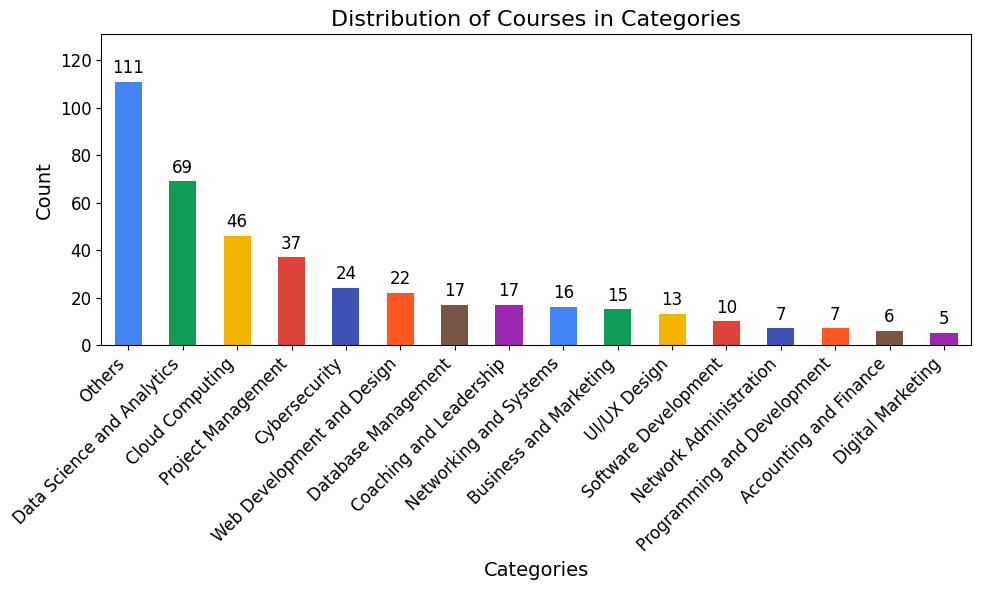

In [60]:
# Visualization of our Classication with Bar chart
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color=['#4285F4', '#0F9D58', '#F4B400', '#DB4437', '#3F51B5', '#FF5722', '#795548', '#9C27B0'])
plt.xlabel('Categories', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Courses in Categories', fontsize=16)
for i, count in enumerate(category_counts):
    plt.text(i, count+ 2 , str(count), ha='center', va='bottom', fontsize=12)
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)
plt.ylim(0, max(category_counts) + 20)
plt.tight_layout()
plt.show()


#### Pie Chart

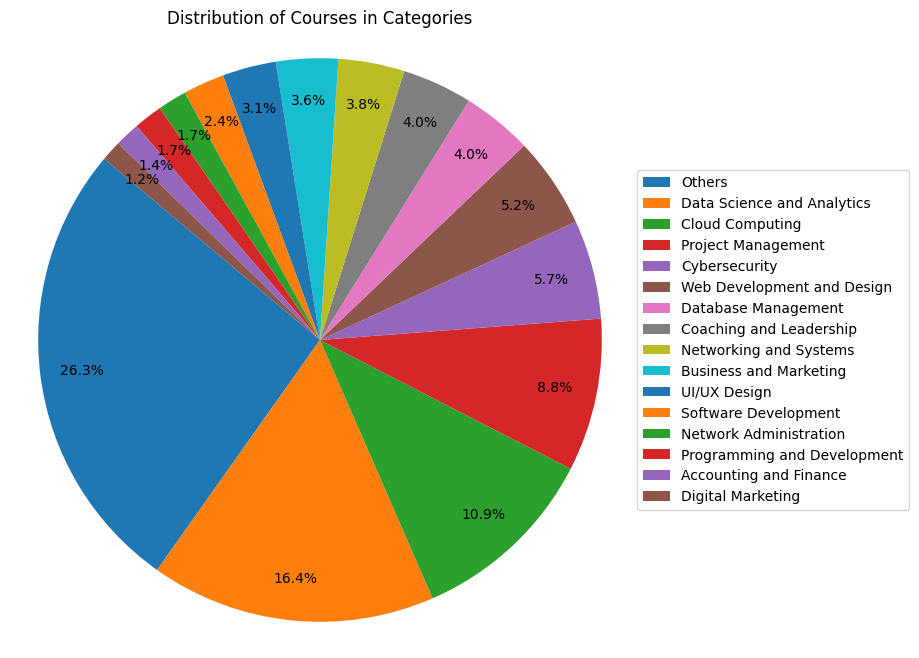

In [61]:
# Visualization of our Classication with pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=None, autopct='%1.1f%%', startangle=140,pctdistance=0.85)
plt.axis('equal')  
plt.title('Distribution of Courses in Categories')
plt.legend(category_counts.index, loc='center left',bbox_to_anchor=(1, 0.5))
plt.show()

In [62]:
# Saving as a csv file.
df.to_csv("D:\Project-VH_3\classified_coursedata.csv",index = None)